In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
import os



In [16]:
# load what we need from the config file
with open(os.path.abspath(os.path.dirname(__file__)) +'/../../../config.json','r') as f:
    config = json.load(f)

BASE_PATH_1 = config['RecordingFolder']
BASE_PATH_2 = config['RecordingFolder_2']
CELL_DICT = config['AnalysisFile']

NameError: name '__file__' is not defined

In [3]:
 # load the first dictionary file
cell = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-063/suite2p/plane0/cells.pkl"

with open(cell, 'rb') as f:
    cell_dict_1 = pickle.load(f)

In [6]:
cell_ID = cell_dict_1[138]
nfreq = list(cell_ID['traces'].keys())
nInt = list(cell_ID['traces'][nfreq[0]].keys())
ntrial = list(cell_ID['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)


[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [20]:
cell0 = cell_ID['traces']
matrix = np.array([[[cell0[i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
matrix_all = np.array([[[[cell_dict_1[n]['traces'][i][j][k] for n in cell_dict_1.keys()] for k in ntrial] for j in nInt] for i in nfreq])
print(matrix_all.shape)
print(matrix.shape)

(12, 4, 10, 708, 15)
(12, 4, 10, 15)


In [21]:
matrix_av = matrix.mean(axis=2)
matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)
print(matrix_av.shape)
print(matrix_res.shape)

(12, 4, 15)
(12, 4)


In [17]:
matrix_flatten = (matrix_all).reshape(-1,715)
print(matrix_flatten.shape)


ValueError: cannot reshape array of size 5097600 into shape (715)

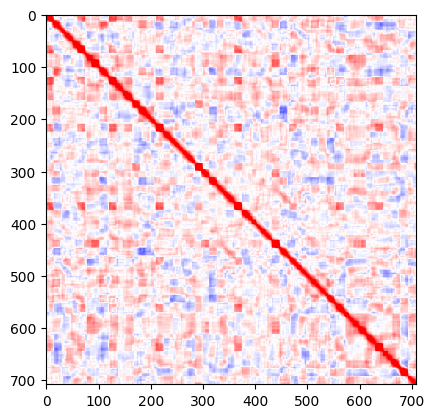

In [14]:
from sklearn.metrics import pairwise_distances

cc = 1-pairwise_distances(matrix_flatten.T, metric='correlation')
plt.imshow(cc, vmin=-.5, vmax=.5, cmap='bwr')

In [13]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
x = isomap.fit_transform(cc)

plt.plot(x[:,0], x[:,1], 'k.')

NameError: name 'cc' is not defined

In [18]:
tuningf = np.array([np.abs(np.linalg.svd(matrix_res[...,i])[0][:,0]) for i in range(matrix_res.shape[-1])])
tuningi = np.array([np.abs(np.linalg.svd(matrix_res[...,i])[2][0]) for i in range(matrix_res.shape[-1])])
S =  np.array([np.linalg.svd(matrix_res[...,i])[1][0]**2/(np.linalg.svd(matrix_res[...,i])[1]**2).sum() for i in range(matrix_res.shape[-1])])
print(tuningf.shape)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [167]:
# plt.hist(tuningf[S>0.6].argmax(axis=1), bins=np.arange(-0.5, 12.5, 1))
# plt.figure()
# plt.hist(tuningi[S>0.6].argmax(axis=1))
# print(nInt)

(12, 12) (4, 4)


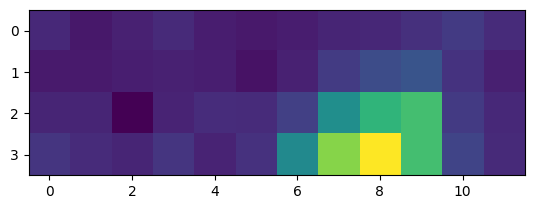

In [178]:
U, S, Vt = np.linalg.svd(matrix_res)
print(U.shape, Vt.shape)
plt.imshow(matrix_res.T)

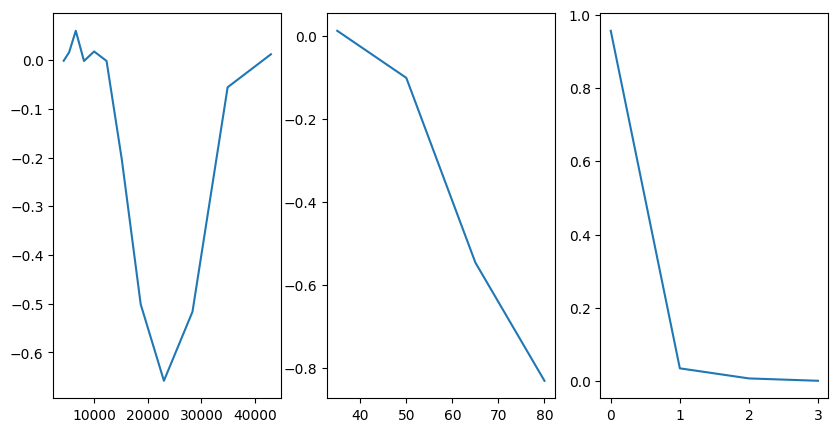

In [179]:
fig, ax = plt.subplots(ncols=3, figsize=(10,5))
ax[0].plot(nfreq, U[:,0])
ax[1].plot(nInt, Vt[0])
ax[2].plot(S**2/(S**2).sum())

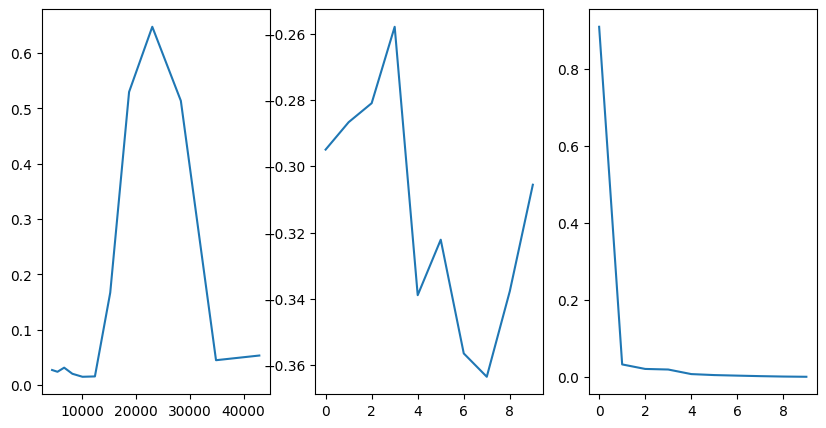

In [83]:
U, S, Vt = np.linalg.svd(matrix_wdf)
fig, ax = plt.subplots(ncols=3, figsize=(10,5))
ax[0].plot(nfreq, np.abs(U[:,0]))
ax[1].plot(Vt[0])
ax[2].plot(S**2/(S**2).sum())